In [1]:
import wandb
wandb.login()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /home/linuxjohansson/.netrc


True

In [1]:

from roboflow import Roboflow
rf = Roboflow(api_key="AawnMSY19Y3YNcmMjZWX")
project = rf.workspace("lidarimages-9xnln").project("xr-synthesizer")
dataset = project.version(4).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Xr-Synthesizer-4 in yolov5pytorch:: 100%|██████████| 272/272 [00:00<00:00, 10403.72it/s]


In [3]:
!python3.9 train.py --img 1280 --batch 16 --epochs 30 --data "Xr-Synthesizer-4/data.yaml" --weights yolov5m.pt --cache

wandb: Currently logged in as: totto. Use `wandb login --relogin` to force relogin
train: weights=yolov5m.pt, cfg=, data=Xr-Synthesizer-4/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=1280, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/Tottowich/Yolo ✅
YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw

In [12]:
!python3.9 detect.py --weights runs/train/exp/weights/last.pt --source "Xr-Synthesizer-3/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg" --img 640 --conf 0.1

detect: weights=['runs/train/exp/weights/last.pt'], source=Xr-Synthesizer-3/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
torch.Size([3, 320, 640])
image 1/1 /home/linuxjohansson/Code/XrSynth/Yolo/Xr-Synthesizer-3/test/images/image_1_jpg.rf.e0ba606a9c49c7ae965ffc5f415ffb78.jpg: 320x640 Done. (0.011s)
Speed: 0.2ms pre-process, 10.6ms inference, 0.2ms NMS per image at shape (1, 3, 640, 640)
Results saved 

In [8]:
!python3.9 val.py --weights runs/train/exp5/weights/last.pt --data "Xr-Synthesizer-4/data.yaml" --conf 0.3 --img 1280

val: data=Xr-Synthesizer-4/data.yaml, weights=['runs/train/exp5/weights/last.pt'], batch_size=32, imgsz=1280, conf_thres=0.3, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning '/home/linuxjohansson/Code/XrSynth/Yolo/Xr-Synthesizer-4/valid/lab
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all          6         20          1          1      0.995       0.64
Speed: 1.2ms pre-process, 9.8ms inference, 1.4ms NMS per image at shape (32, 3, 1280, 1280)
Results saved to runs/val/exp3


In [28]:
!python3.9 detect.py --weights runs/train/exp5/weights/last.pt --source "Xr-Synthesizer-4/train/images" --img 1280 --conf 0.1 --view-img --nosave

detect: weights=['runs/train/exp5/weights/last.pt'], source=Xr-Synthesizer-4/train/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=True, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

Fusing layers... 
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Qt: Session management error: Could not open network socket
image 1/114 /home/linuxjohansson/Code/XrSynth/Yolo/Xr-Synthesizer-4/train/images/image_0_jpg.rf.20ed2946398e26878bc6fa419a3df0b1.jpg: 640x1280 3 Adults, Done. (0.012s)
image 2/114 /home/linuxjohansson/Code/XrSynth/Yolo/Xr-Synthesizer-4/train/images/image_0_jpg.rf.2a1af05169

In [ ]:
lidarImages/4_people_standard_room/image_2.jpg,Xr-Synthesizer-4/test/images/image_7_jpg.rf.dc94710b4d559bc61e3baf53a2a309c7.jpg

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [31]:
a = np.random.random((1,64,1024,3))


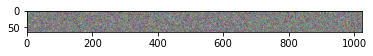

(640, 1280, 3)


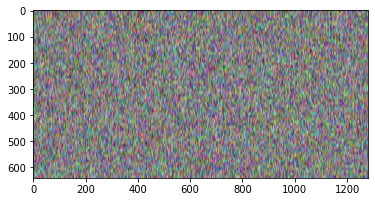

In [47]:
a = np.random.random((1,64,1024,3))
plt.imshow(X=a[0])
plt.show()
a = cv2.resize(a[0],(1280,640),interpolation=cv2.INTER_LINEAR)
#a = np.stack(a, 0)
print(a.shape)
plt.imshow(X=a)

In [17]:
class ARG:
    weights = "runs/train/exp5/weights/last.pt"
    imgsz = 1280
    data = "Xr-Synthesizer-4/data.yaml"
    conf_thres = 0.25
    iou_thres = 0.45
    line_thickness = 3
    hide_labels = False
    hide_conf = False
    half = False
    dnn = False
    device = 0
    auto = True
    augment = False
    classes = None
    OU_ip = "192.168.200.78"
    udp_port = 7502
    tcp_port = 7503
    agnostic_nms = False
    max_det = 1000
    disp_pred = True

In [18]:
args = ARG()
device = select_device(device=args.device)
model, stride, names, pt, device,live = initialize_network(args,device)

INFO - 2022-07-04 14:35:48,838 - torch_utils - YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

INFO - 2022-07-04 14:35:48,927 - torch_utils - YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

YOLOv5 🚀 v6.1-251-gfb8faaf Python-3.9.13 torch-1.10.0+cu113 CUDA:0 (NVIDIA GeForce RTX 3090, 24235MiB)

INFO - 2022-07-04 14:35:49,000 - yolo - Fusing layers... 
Fusing layers... 
INFO - 2022-07-04 14:35:49,178 - torch_utils - Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Model summary: 290 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs


In [19]:
img0 = cv2.imread("Xr-Synthesizer-4/test/images/image_7_jpg.rf.cdc337e56bd160b69a16f7693b2650e4.jpg").astype(np.float32)
print(f"img0.shape: {img0.shape}")
print(f"img0 type: {type(img0)}")

img0 /= 255.0
img0, img = live.prep(img0)
if len(img0.shape) == 3:
    img0 = img0[None]
img = torch.from_numpy(img).to(device)
img = img.half() if model.fp16 else img.float()
pred = model(img,augment=args.augment)
pred = non_max_suppression(pred, args.conf_thres, args.iou_thres, args.classes, args.agnostic_nms, max_det=args.max_det)


img0.shape: (640, 1280, 3)
img0 type: <class 'numpy.ndarray'>
(1280, 1280)
(640, 1280, 3)
(1280, 1280, 3)


In [20]:
"Xr-Synthesizer-4/train/images/image_0_jpg.rf.54d014cb9dce43508282d04d354fca4d.jpg"
"../lidarImages/4_people_standard_room/image_8.jpg"

'../lidarImages/4_people_standard_room/image_8.jpg'

In [21]:
print(f"pred: {pred}")
print(f"pred type: {type(pred)}")
print(f"img0.shape: {img0.shape}")

pred: [tensor([[3.75616e+02, 2.18695e+01, 5.41170e+02, 7.15360e+02, 2.86963e-01, 0.00000e+00]], device='cuda:0')]
pred type: <class 'list'>
img0.shape: (1, 640, 1280, 3)


In [22]:
print(img[0,0,:,:].max())
print(img[0,1,:,:].max())
print(img[0,2,:,:].max())
%matplotlib inline

tensor(0.51667, device='cuda:0')
tensor(0.54902, device='cuda:0')
tensor(0.38333, device='cuda:0')


img0.shape: (640, 1280, 3)
img0 type: <class 'numpy.ndarray'>
(1280, 1280)
(640, 1280, 3)
(1280, 1280, 3)
Detection:  tensor([[3.75616e+02, 2.18695e+01, 5.41170e+02, 7.15360e+02, 2.86963e-01, 0.00000e+00]], device='cuda:0')
adult 0.29
(3, 1280, 1280)


(<Figure size 864x648 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x7f74373d7820>)

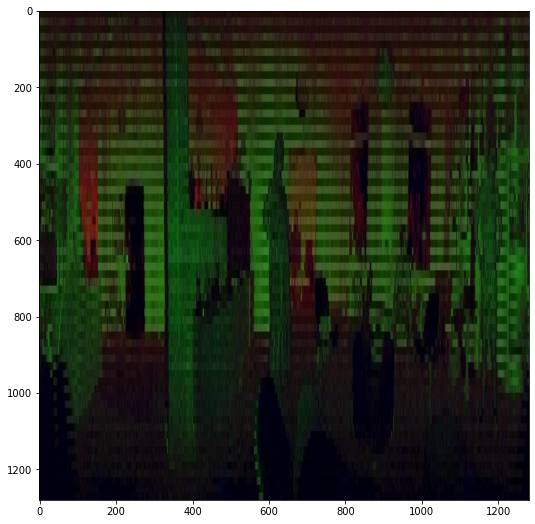

In [23]:
img0 = cv2.imread("Xr-Synthesizer-4/test/images/image_7_jpg.rf.cdc337e56bd160b69a16f7693b2650e4.jpg").astype(np.float32)
print(f"img0.shape: {img0.shape}")
print(f"img0 type: {type(img0)}")

img0 /= 255.0
img0, img = live.prep(img0)
if len(img0.shape) == 3:
    img0 = img0[None]
img = torch.from_numpy(img).to(device)
img = img.half() if model.fp16 else img.float()
pred = model(img,augment=args.augment)
pred = non_max_suppression(pred, args.conf_thres, args.iou_thres, args.classes, args.agnostic_nms, max_det=args.max_det)

visualize_yolo_test(pred,img.cpu().numpy(),args,names= ["adult"])

In [15]:
def visualize_yolo_test(pred,img_vis,args,fig=None,plot=None,names=None,logger=None):
    detections = 0
    img = img_vis
    if fig is None or plot is None:
        fig = plt.figure(figsize=(12, 9))

        plot = plt.imshow(img[0].transpose(1,2,0))
        #plt.show()
    for i,det in enumerate(pred):
        detections += 1
        annotator = Annotator(img, line_width=args.line_thickness, example=str(names))
        if det is not None and len(det) > 0:
            print("Detection: ",det)
            det[:,:4] = scale_coords(img.shape[2:], det[:,:4], img.shape).round()
            if args.disp_pred and logger is not None:
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
                logger.info(f"{names[int(c)]} detections: {s}")
            for *xyxy, conf, cls in reversed(det):
                c = int(cls)  # integer class
                label = None if args.hide_labels else (names[c] if args.hide_conf else f'{names[c]} {conf:.2f}')
                annotator.box_label(xyxy, label, color=colors(c, True))
                print(label)
            img0 = annotator.result()[0]
            print(img0.shape)
            cv2.imwrite("runs/detect/exp10/img.jpg",img0.transpose(1,2,0)*255)
            #plot.set_data(img0[0].transpose(1,2,0)/255)
            #fig.canvas.draw()
            #fig.canvas.flush_events()
        else:
            print("No detections")
            plot.set_data(img.transpose(1,2,0)*255)
            fig.canvas.draw()
            fig.canvas.flush_events()
    
    return fig,plot

In [9]:
%load_ext autoreload
%autoreload 2

In [4]:
import argparse
import os, sys
import glob
from pathlib import Path
import time
import numpy as np
import torch
import threading
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt 
from queue import Queue
from copy import copy
from pathlib import Path
#FILE = Path(__file__).resolve()
FILE = os.path.abspath('')
ROOT = FILE
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT)) # Add ROOT
ROOT = Path(os.path.relpath(ROOT, Path.cwd())) # Relative Path
import open3d
sys.path.insert(0, '../OusterTesting')
sys.path.insert(1, '../OpenPCDet-linux')
from models.common import DetectMultiBackend
import torch.backends.cudnn as cudnn
import utils_ouster
from tools.transmitter import Transmitter
from tools.visual_utils.open3d_live_vis import LiveVisualizer
from ouster import client
from contextlib import closing
from tools.visual_utils import open3d_vis_utils as V
#from pcdet.config import cfg, cfg_from_yaml_file
#from pcdet.datasets import DatasetTemplate
#from pcdet.models import build_network, load_data_to_gpu
from tools.xr_synth_utils import CSVRecorder,TimeLogger,filter_predictions,format_predictions,display_predictions
from tools.xr_synth_utils import create_logger
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, cv2,
                           increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync
from utils.augmentations import Albumentations, augment_hsv, copy_paste, letterbox, mixup, random_perspective
class live_stream:
    """
    Class to stream data from a Sensor.
    Inheritance:
        DatasetTemplate:
            Uses batch processing and collation.
    """
    def __init__(self, classes,ip,stride=32,img_size=(1280,1280), logger=None,auto=True):
        """
        Args:
            root_path:
            dataset_cfg:
            class_names:
            training:
            logger:
        """
        self.classes = classes
        self.ip = ip

        self.stride = stride
        self.img_size = img_size
        self.logger = logger
        self.auto = auto
        self.rect = True
        self.frame = 0
        
    def prep(self,img0):
        """started
        Prepare data from the lidar sensor.
        args:
            points: xyz/xyzr points from sensor.
        """
        print(self.img_size)
        print(img0.shape)
        img = self.reshape(copy(img0))
        print(img.shape)
        if len(img.shape) == 3:
            img = img[None]
        #img = img[..., ::-1].transpose((0,3,1,2))  # BGR to RGB, BHWC to BCHW
        img = img.transpose((0,3,1,2))  # BGR to RGB, BHWC to BCHW
        
        img = np.ascontiguousarray(img)
        self.frame += 1
        return img0,img
    def reshape(self,img):
        """
        Reshape the data to be compatible with the model.
        Args:
            img:
        """
        img = cv2.resize(img,self.img_size,interpolation=cv2.INTER_LINEAR)
        return img

def initialize_network(args,device):
    device = select_device(args.device)
    model = DetectMultiBackend(args.weights, device=device, dnn=args.dnn, data=args.data, fp16=args.half)
    stride, names, pt = model.stride, model.names, model.pt
    imgsz = (args.imgsz, args.imgsz) if isinstance(args.imgsz, int) else args.imgsz  # tuple
    imgsz = check_img_size(imgsz=imgsz, s=stride)
    imgsz = (imgsz[0],imgsz[0])
    model.warmup(imgsz=(1 if pt else 1, 3, *imgsz))
    live = live_stream(classes=names,ip=args.OU_ip,stride=stride,img_size=imgsz,auto=args.auto)

    return model, stride, names, pt, device,live
def initialize_timer(transmitter,logger,args):
    time_logger = TimeLogger(logger,args.disp_pred)
    time_logger.create_metric("Ouster Processing")
    #time_logger.create_metric("Pre Processing")
    #time_logger.create_metric("Load GPU")
    time_logger.create_metric("Infrence")
    time_logger.create_metric("Post Processing")
    #time_logger.create_metric("Filter Predictions")

    if args.visualize:
        time_logger.create_metric("Visualize")
    if args.save_csv:
        time_logger.create_metric("Save CSV")
    if transmitter.started_udp:
        time_logger.create_metric("Transmit TD")
    if transmitter.started_ml:
        time_logger.create_metric("Transmit UE5")
    time_logger.create_metric("Full Pipeline")

    return time_logger
def visualize_yolo(pred,img_vis,args,fig=None,plot=None,names=None,logger=None):
    detections = 0
    img = img_vis
    print(img.shape)
    if fig is None or plot is None:
        fig = plt.figure(figsize=(12, 9))

        plot = plt.imshow(img[0].transpose(1,2,0))
        #plt.show()
    for i,det in enumerate(pred):
        detections += 1
        annotator = Annotator(img, line_width=args.line_thickness, example=str(names))
        if det is not None and len(det) > 0:
            print("Detection: ",det)
            det[:,:4] = scale_coords(img.shape[2:], det[:,:4], img.shape).round()
            if args.disp_pred and logger is not None:
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
                logger.info(f"{names[int(c)]} detections: {s}")
            for *xyxy, conf, cls in reversed(det):
                c = int(cls)  # integer class
                label = None if args.hide_labels else (names[c] if args.hide_conf else f'{names[c]} {conf:.2f}')
                annotator.box_label(xyxy, label, color=colors(c, True))
            img0 = annotator.result()
            cv2.imshow(img0)
            print(img0.shape)
            #plot.set_data(img0[0].transpose(1,2,0)/255)
            #fig.canvas.draw()
            #fig.canvas.flush_events()
        else:
            print("No detections")
            plot.set_data(img[0].transpose(1,2,0)/255)
            fig.canvas.draw()
            fig.canvas.flush_events()
    
    return fig,plot



def parse_config():
    parser = argparse.ArgumentParser(description='arg parser')
    #parser.add_argument('--cfg_file', type=str, default='cfgs/kitti_models/second.yaml',
    #                    help='specify the config for demo')
    parser.add_argument('--weights', nargs='+', type=str, default=ROOT / 'yolov5s.pt', help='model path(s)')
    parser.add_argument('--imgsz', '--img', '--img-size', nargs='+', type=int, default=1280, help='inference size h,w')
    parser.add_argument('--data', type=str, default=ROOT / 'data/coco128.yaml', help='(optional) dataset.yaml path')
    parser.add_argument('--max_det', type=int, default=1000, help='maximum detections per image')
    parser.add_argument('--conf_thres', type=float, default=0.25, help='confidence threshold')
    parser.add_argument('--iou_thres', type=float, default=0.45, help='NMS IoU threshold')
    parser.add_argument('--line_thickness', default=3, type=int, help='bounding box thickness (pixels)')
    parser.add_argument('--hide_labels', default=False, action='store_true', help='hide labels')
    parser.add_argument('--hide_conf', default=False, action='store_true', help='hide confidences')
    parser.add_argument('--half', action='store_true', help='use FP16 half-precision inference')
    parser.add_argument('--dnn', action='store_true', help='use OpenCV DNN for ONNX inference')
    parser.add_argument('--device', default='', help='cuda device, i.e. 0 or 0,1,2,3 or cpu')    
    parser.add_argument('--ckpt', type=str, default=None, help='specify the pretrained model')
    parser.add_argument('--auto', action='store_true', help='auto size using the model')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class: --classes 0, or --classes 0 2 3')

    #parser.add_argument('--ext', type=str, default='.bin', help='specify the extension of your point cloud data file')
    parser.add_argument('--OU_ip', type=str, default=None, help='specify the ip of the sensor')
    parser.add_argument('--name', type=str, default=None, help='specify the name of the sensor')
    parser.add_argument('--UE5_ip', type=str, default=None, help='specify the ip of the UE5 machine')
    parser.add_argument('--TD_ip', type=str, default=None, help='specify the ip of the TD machine')

    parser.add_argument('--udp_port', type=int, default=7502, help='specify the udp port of the sensor')
    parser.add_argument('--tcp_port', type=int, default=7503, help='specify the tcp port of the sensor')
    parser.add_argument('--TD_port', type=int, default=7002, help='specify the port of the TD machine')
    parser.add_argument('--UE5_port', type=int, default=7000, help='specify the port of the UE5 machine')
    parser.add_argument('--time', type=int, default=100
    , help='specify the time to stream data from a sensor')
    #parser.add_argument('--save_dir', type=str, default="../lidarCSV", help='specify the save directory')
    #parser.add_argument('--save_name', type=str, default="test_csv", help='specify the save name')
    if sys.version_info >= (3,9):
        parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
        parser.add_argument('--visualize', action=argparse.BooleanOptionalAction)
        parser.add_argument('--save_csv', action=argparse.BooleanOptionalAction)
        parser.add_argument('--log_time', action=argparse.BooleanOptionalAction)
        parser.add_argument('--disp_pred', action=argparse.BooleanOptionalAction) 
        

    else:
        parser.add_argument('--visualize', action='store_true')
        parser.add_argument('--no-visualize', dest='visualize', action='store_false')
        parser.add_argument('--save_csv', action='store_true')
        parser.add_argument('--no-save_csv', dest='save_csv', action='store_false')
        parser.add_argument('--log_time', action='store_true')
        parser.add_argument('--no-log_time', dest='log_time', action='store_false')
        parser.add_argument('--disp_pred', action='store_true')
        parser.add_argument('--no-disp_pred', dest='disp_pred', action='store_false')
        parser.set_defaults(visualize=True)
        parser.set_defaults(save_csv=False)
    args = parser.parse_args()

    #cfg_from_yaml_file(args.cfg_file, cfg)

    return args#, cfg


@torch.no_grad()
def main():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    args= parse_config()
    fig = None
    plot = None
    cudnn.benchmark = True  # set True to speed up constant image size inference
    #model = DetectMultiBackend(args.weights, device=device, dnn=args.dnn, data=args.data, fp16=args.half)
    logger = create_logger()
    model, stride, names, pt, device,live = initialize_network(args,device)
    if args.OU_ip is None and args.name is None:
        raise ValueError('Please specify the ip or sensor name of the ')
    # Select classes to use, None -> all.
    # classes_to_use = [8]
    # Set up interactions
    #live = live_stream(cfg.DATA_CONFIG, cfg.CLASS_NAMES, logger=logger)
    if args.save_csv:
        recorder = CSVRecorder(args.save_name,args.save_dir, cfg.CLASS_NAMES)
    limits = {"ir":6000,"reflectivity": 255, "range":25000}
    #if range_limit is not None:
    #    cfg.DATA_CONFIG.POINT_CLOUD_RANGE = [-range_limit[0],-range_limit[1],-range_limit[2],range_limit[0],range_limit[1],range_limit[2]]
        
    # Set up network
    #model = initialize_network(cfg,args,logger,live)
    # Set up local network ports for IO
    transmitter = Transmitter(reciever_ip=args.TD_ip, reciever_port=args.TD_port, classes_to_send=[9])
    transmitter.start_transmit_udp()
    transmitter.start_transmit_ml()
    try:
        [cfg_ouster, host_ouster] = utils_ouster.sensor_config(args.name if args.name is not None else args.OU_ip,args.udp_port,args.tcp_port)
    except:
        raise ConnectionError('Could not connect to the sensor')
    log_time = False # False to let the program run for one loop to warm up :)
    if args.log_time:
        time_logger = initialize_timer(logger=logger,transmitter=transmitter,args=args)


    with closing(client.Scans.stream(host_ouster, args.udp_port,complete=False)) as stream:
        logger.info(f"Streaming lidar data to: Yolov5 using {args.weights}")
         # time 
        
        start_stream = time.monotonic()
        
        for i,scan in enumerate(stream): # Ouster scan object
            if log_time:
                time_logger.start("Ouster Processing")
            # Get lidar data
            img0 = utils_ouster.get_ref_range_ir(stream,scan,limits)
            
            img0 /= 255
            img0,img = live.prep(img0)
            if len(img0.shape) == 3:
                img0 = img0[None]
            img = torch.from_numpy(img).to(device)
            img = img.half() if model.fp16 else img.float()  # uint8 to fp16/32
            if log_time:
                time_logger.stop("Ouster Processing")
            
            #if range_limit is not None:
            #    xyzr = utils_ouster.trim_xyzr(xyzr,range_limit)
            #xyzr = utils_ouster.trim_data(data=xyzr,range_limit=range_limit,source=stream,scan=scan)
            #print(f"Input point cloud shape: {xyzr.shape}")
            if i%2 == 0 and log_time:
                time_logger.start("Full Pipeline")
            if i%2 == 1 and log_time and i != 1:
                time_logger.stop("Full Pipeline")
            i+=1
            #if log_time:
            #    time_logger.start("Data Prep")
            #data_dict = live.prep(xyzr)
            #if log_time:
            #    time_logger.stop("Data Prep")
            #print(f"data_dict: {data_dict}\npoints.shape = {data_dict['points'].shape}")
            #print(f"points: {sum(data_dict['points'][:,0]==0)}")
            #print(f"points: {(data_dict['points'][:8,:])}")

            #print(f"points.shape: {data_dict['points'][0].shape}")
            

            #if log_time:
            #    time_logger.start("Load GPU")
            #load_data_to_gpu(data_dict)
            #if log_time:
            #    time_logger.stop("Load GPU")

            if log_time:
                time_logger.start("Infrence")
            pred = model(img,augment=args.augment)
            if log_time:
                time_logger.stop("Infrence")
            if log_time:
                time_logger.start("Post Processing")
            pred = non_max_suppression(pred, args.conf_thres, args.iou_thres, args.classes, args.agnostic_nms, max_det=args.max_det)
            if log_time:
                time_logger.stop("Post Processing")
            #print(pred)
            
            #if log_time:
            #    time_logger.start("Filter Predictions")
            # Only uses pred_dicts[0] since batch size is one at live infrence
            #pred_dicts = filter_predictions(pred_dicts[0], classes_to_use)
            #if log_time:
            #    time_logger.stop("Filter Predictions")
                
            
            
            # if args.save_csv: # If recording, save to csv
            #     if log_time:
            #         time_logger.start("Save CSV")
            #     recorder.add_frame_file(copy(data_dict["points"][:,1:-1]).cpu().numpy(),pred_dicts)
            #     if log_time:
            #         time_logger.stop("Save CSV")
                #logger.info(f"Time to save to csv: {time.monotonic() - start:.3e}")
            
            # if transmitter.started_ml:
            #     if log_time:
            #         time_logger.start("Transmit UE5")
            #     transmitter.pcd = copy(data_dict["points"][:,1:])
            #     transmitter.pred_dict = copy(pred_dicts)
            #     transmitter.send_pcd()
            #     if log_time:
            #         time_logger.stop("Transmit UE5")


            # if transmitter.started_udp: # If transmitting, send to udp
            #     if log_time:
            #         time_logger.start("Transmit TD")
            #     transmitter.pred_dict = copy(pred_dicts)
            #     transmitter.send_dict()
            #     if log_time:
            #         time_logger.stop("Transmit TD")

            #logger.info(f"Frame {live.frame}")
            if args.visualize:

                if log_time:
                    time_logger.start("Visualize")
                fig,plot = visualize_yolo(pred,img,args,fig=fig,plot=plot)
                if log_time:
                    time_logger.stop("Visualize")
                #vis = V.create_live_scene(data_dict['points'][:,1:],ref_boxes=pred_dicts[0]['pred_boxes'],
                #ref_scores=pred_dicts[0]['pred_scores'], ref_labels=pred_dicts[0]['pred_labels'])
            # #elif args.visualize:
            #     start = time.monotonic()
            #     #V.update_live_scene(vis,pts,points=data_dict['points'][:,1:], ref_boxes=pred_dicts[0]['pred_boxes'],
            #     #    ref_scores=pred_dicts[0]['pred_scores'], ref_labels=pred_dicts[0]['pred_labels'],class_names=cfg.CLASS_NAMES)
            #     if log_time:
            #         time_logger.start("Visualize")
            #     vis.update(points=data_dict['points'][:,1:], 
            #                 pred_boxes=pred_dicts['pred_boxes'],
            #                 pred_labels=pred_dicts['pred_labels'],
            #                 pred_scores=pred_dicts['pred_scores'],
            #                 )
            #     if log_time:
            #         time_logger.stop("Visualize")
            if time.monotonic()-start_stream > args.time:
                stream.close()
                break
            if log_time and args.disp_pred:
                print("\n")
            #if i == 6:
            #    break 
            log_time = args.log_time
    transmitter.stop_transmit_udp()
    transmitter.stop_transmit_ml()
    if log_time:
        time_logger.visualize_results()
    logger.info("Stream Done")

"""
NuScenes uses the following labels:
    CLASS_NAMES: ['car','truck', 'construction_vehicle', 'bus', 'trailer',
              'barrier', 'motorcycle', 'bicycle', 'pedestrian', 'traffic_cone']
    Note: 'pedestrian is predicted as index 9'
    This program uses has been tested with the Ouster OS0-64 sensor.
    Example Input:
        python3 live_predictions.py --cfg_file 'cfgs/nuscenes_models/cbgs_voxel0075_res3d_centerpoint.yaml' --ckpt "../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth" --OU_ip "192.168.200.78" --TD_ip "192.168.200.103" --TD_port 7002  --time 300 --udp_port 7001 --tcp_port 7003 --name "OS0-64" --visualize

"""

#if __name__ == '__main__':
#    main()



Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


'\nNuScenes uses the following labels:\n    CLASS_NAMES: [\'car\',\'truck\', \'construction_vehicle\', \'bus\', \'trailer\',\n              \'barrier\', \'motorcycle\', \'bicycle\', \'pedestrian\', \'traffic_cone\']\n    Note: \'pedestrian is predicted as index 9\'\n    This program uses has been tested with the Ouster OS0-64 sensor.\n    Example Input:\n        python3 live_predictions.py --cfg_file \'cfgs/nuscenes_models/cbgs_voxel0075_res3d_centerpoint.yaml\' --ckpt "../checkpoints/cbgs_voxel0075_centerpoint_nds_6648.pth" --OU_ip "192.168.200.78" --TD_ip "192.168.200.103" --TD_port 7002  --time 300 --udp_port 7001 --tcp_port 7003 --name "OS0-64" --visualize\n\n'